In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from EMP.EMP import drawPuzzle, generatePuzzle, isCorrect
from EMP.Algorithms.BT import BT
import random
import time


In [2]:
from EMP.EMP import _rotate, _validPiece, _emptyPiece
import copy

In [3]:
def pieceMatch(grid, piece, position, EMPType='SF'):
    gridSize_Y = len(grid)
    gridSize_X = len(grid[0])
    idxRow = position[0]
    idxPiece = position[1]
    isMatch = False
    piece[:] = _rotate(piece, 1)
    isMatch = True
    #left edge
    if not(idxPiece == 0  or not _validPiece(grid[idxRow][idxPiece-1])):
        if not _emptyPiece(grid[idxRow][idxPiece-1]):
            if piece[0] != grid[idxRow][idxPiece-1][2]: 
                isMatch = False
        elif EMPType == 'SF' and piece[0] == 0:
            isMatch = False
    elif EMPType == 'SF':
        if piece[0] != 0: isMatch = False

    #top edge
    if not(idxRow == 0 or not _validPiece(grid[idxRow-1][idxPiece])):
        if not _emptyPiece(grid[idxRow-1][idxPiece]):
            if piece[1] != grid[idxRow-1][idxPiece][3]:
                isMatch = False
        elif EMPType == 'SF' and piece[1] == 0:
            isMatch = False
    elif EMPType == 'SF':
        if piece[1] != 0: isMatch = False
                
    #right edge
    if not(idxPiece == gridSize_X-1 or not _validPiece(grid[idxRow][idxPiece+1])):
        if not _emptyPiece(grid[idxRow][idxPiece+1]):
            if piece[2] != grid[idxRow][idxPiece+1][0]:                   
                isMatch = False
        elif EMPType == 'SF' and piece[2] == 0:
            isMatch = False
    elif EMPType == 'SF':
        if piece[2] != 0: isMatch = False
                
    #bottom edge
    if not(idxRow == gridSize_Y-1 or not _validPiece(grid[idxRow+1][idxPiece])):
        if not _emptyPiece(grid[idxRow+1][idxPiece]):
            if piece[3] != grid[idxRow+1][idxPiece][1]: 
                isMatch = False
        elif EMPType == 'SF' and piece[3] == 0:
            isMatch = False
    elif EMPType == 'SF':
        if piece[3] != 0: isMatch = False
            
    if isMatch:
        return True
    
    return False
    
        
    

In [4]:
def nextPosition(grid, currentPos):
    gridSize_Y = len(grid)
    gridSize_X = len(grid[0])
    pos = None
    if currentPos[1] == gridSize_X-1:
        pos = [currentPos[0]+1, 0]
    else:
        pos = [currentPos[0], currentPos[1]+1]
    if pos[0] >= gridSize_Y:
        return False
    
    while not _validPiece(grid[pos[0]][pos[1]]):
        #print(pos)
        if pos[1] == gridSize_X-1:
            pos = [pos[0]+1, 0]
        else:
            pos = [pos[0], pos[1]+1]
        
        if pos[0] >= gridSize_Y:
            return False


    return pos

def removePiece(piece, pieces):
    for i in range(4):
        try:
            piece = _rotate(piece, 1)
            pieces.remove(piece[:])
            return
        except:
            i = 0
    raise Exception("piece not in list to remove")
        
    
def BT(grid,pieces,position, EMPType='SF'):
    if position == False:
        return True
    
    gridSize_Y = len(grid)
    gridSize_X = len(grid[0])
    pos = list(position)
    tempPieces = copy.deepcopy(pieces)
    for piece in tempPieces:
        if pieceMatch(grid, piece, pos, EMPType=EMPType):
            grid[pos[0]][pos[1]] = piece
            #drawPuzzle(grid).show()
            removePiece(piece, pieces)
            if BT(grid, pieces, nextPosition(grid, position), EMPType=EMPType):
                return True
            else:
                pieces.append(grid[pos[0]][pos[1]])
                grid[pos[0]][pos[1]] = [-2, -2, -2, -2]
                #drawPuzzle(grid).show()

                
    return False
        

        
    

In [ ]:
from graphviz import Graph
import copy
g = Graph('G', filename='tree.gv', engine='neato')
imagesFile = 'C:\\Users\\Tawfiq\\Documents\\GitHub\\EMP\\Examples\\images\\'
i = 0

def Tree(grid,pieces,position, parentNum, EMPType='SF'):
    if type(grid) == tuple:
        # create the grid with None for colors
        if(EMPType == 'SF' or EMPType == 'S'):
            grid=[[[ -2 for x in range(4)]for y in range(grid[0])] for p in range(grid[1])]
            

    global i
    nodeNum = i
    i += 1
    drawPuzzle(grid, pieceLength=30).save(imagesFile+str(nodeNum)+'.png', format='png')
    g.node(str(nodeNum), label='', shape='box', image=imagesFile+str(nodeNum)+'.png')
    if parentNum != -1:
        g.edge(str(parentNum), str(nodeNum))

    if position == False:
        return True
    
    gridSize_Y = len(grid)
    gridSize_X = len(grid[0])
    pos = list(position)
    tempPieces = copy.deepcopy(pieces)
    for piece in tempPieces:
        for i in range(4):
            piece[:] = _rotate(piece, 1)
            if pieceMatch(grid, piece, pos, EMPType=EMPType):
                grid[pos[0]][pos[1]] = piece
                #drawPuzzle(grid).show()
                removePiece(piece, pieces)
                Tree(grid, pieces, nextPosition(grid, position),nodeNum, EMPType=EMPType)

                pieces.append(grid[pos[0]][pos[1]])
                grid[pos[0]][pos[1]] = [-2, -2, -2, -2]
                    #drawPuzzle(grid).show()

                
    return False
size=(3,3)
pieces, id = generatePuzzle(size,5,EMPType='S', rotate=True)
grid=[[[ -2 for x in range(4)]for y in range(size[0])] for p in range(size[1])]
pos =[0,0]
"""
for piece in pieces:
    if pieceMatch(grid, piece, pos, EMPType='SF'):
        grid[pos[0]][pos[1]] = piece
        removePiece(piece, pieces)
        break
pos=[0,1]
"""
print(Tree(grid, pieces, pos, -1, EMPType='S'))

g.save()

In [153]:
import copy
from EMP.EMP import _rotate, _validPiece, _emptyPiece, _pieceMatch, _removePiece, _nextPosition


def _addCombinedPiece(piece, combinedPieces, rotate=True):
    if rotate:
        for item in combinedPieces:
            for i in range(4):
                if _rotate(piece, i) == item[0]:
                    item[1] += 1
                    return
        combinedPieces.append([piece[:], 1])
    else:
        for item in combinedPieces:
            if piece == item[0]:
                item[1] += 1
                return
        combinedPieces.append([piece[:], 1])
        
def _removeCombinedPiece(piece, combinedPieces, rotate=True):
    if rotate:
        for i in range(4):
            for item in combinedPieces:
                for i in range(4):
                    if _rotate(piece, i) == item[0]:
                        if item[1] < 1: raise Exception("piece not in list to remove")
                        else: 
                            item[1] -= 1
                            return
        raise Exception("piece not in list to remove")
    else:
        for item in combinedPieces:
            if piece == item[0]:
                if item[1] < 1: raise Exception("piece not in list to remove")
                else:
                    item[1] -= 1
                    return
        raise Exception("piece not in list to remove")

            
def _combinePieces(pieces, rotate=True):
    combinedPieces = list()
    for piece in pieces:
        _addCombinedPiece(piece, combinedPieces, rotate=rotate)
    return combinedPieces
        

class BT:
    
    def __init__(self, pieces, grid, EMPType='SF', rotate=True):
        if EMPType not in ['SF','S']:
            raise AssertionError("EMPType "+EMPType+" not defined.")

        if type(pieces) != list: raise AssertionError("pieces should be a list.")
        if type(grid) == tuple:
            # create the grid with None for colors
            if(EMPType == 'SF' or EMPType == 'S'):
                grid=[[[ -2 for x in range(4)]for y in range(grid[0])] for p in range(grid[1])]
            
        elif type(grid) != list: raise AssertionError("grid should be a tuple or list.")
        
        self.pieces = pieces
        self.grid = grid
        self.EMPType = EMPType
        self.solution = None
        self.rotate = rotate
        self.combinedPieces = _combinePieces(self.pieces, rotate=self.rotate)
    
    def search(self, position=[0,0]):
        if position == False:
            return True

        pos = list(position)
        #tempPieces = copy.deepcopy(self.combinedPieces)
        #print(self.combinedPieces)
        for piece in self.combinedPieces:
            if piece[1] > 0:
                if self.rotate:
                    for i in range(4):
                        piece[0] = _rotate(piece[0], 1)
                        
                        if _pieceMatch(self.grid, piece[0], pos, EMPType=self.EMPType):
                            self.grid[pos[0]][pos[1]] = piece[0]
                            if piece[1] > 0: 
                                piece[1] -= 1
                            else: raise Exception("piece not in list to remove")

                            if self.search(position=_nextPosition(self.grid, pos)):
                                return True
                            else:                               
                                piece[1] += 1
                                self.grid[pos[0]][pos[1]] = [-2, -2, -2, -2]
                else:
                    if _pieceMatch(self.grid, piece[0], pos, EMPType=self.EMPType):
                        self.grid[pos[0]][pos[1]] = piece[0]
                        if piece[1] > 0: 
                            piece[1] -= 1
                        else: raise Exception("piece not in list to remove")
                        if self.search(position=_nextPosition(self.grid, pos)):
                            return True
                        else:
                            piece[1] += 1
                            self.grid[pos[0]][pos[1]] = [-2, -2, -2, -2]
        return False
    

In [154]:
pieces, id = generatePuzzle((5,5), 2, EMPType='S', return_='pieces', rotate=False, seed=123)
grid, id = generatePuzzle((5,5), 2, EMPType='S', return_='grid', rotate=False, seed=123)

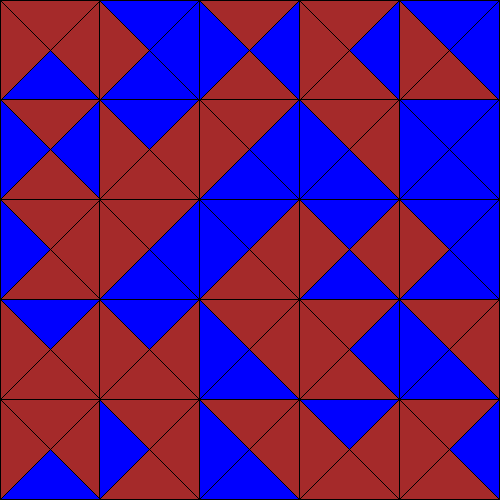

In [155]:
drawPuzzle(grid)

In [156]:
_combinePieces(pieces, rotate=False)

[[[2, 2, 2, 1], 2],
 [[2, 1, 1, 1], 2],
 [[1, 2, 1, 2], 2],
 [[2, 2, 1, 2], 3],
 [[2, 1, 1, 2], 1],
 [[2, 1, 2, 2], 4],
 [[2, 2, 1, 1], 2],
 [[1, 2, 2, 1], 4],
 [[1, 1, 1, 1], 1],
 [[1, 2, 2, 2], 2],
 [[1, 1, 2, 2], 1],
 [[2, 1, 2, 1], 1]]

True


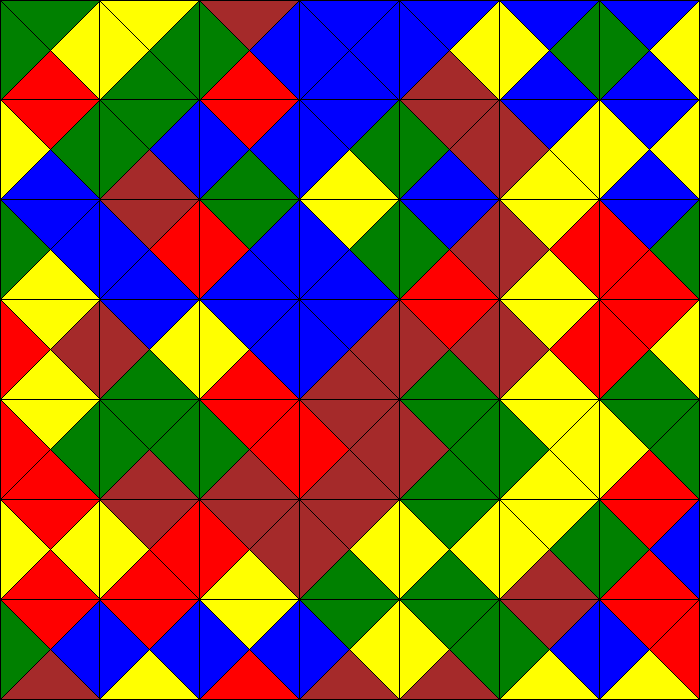

In [163]:
size =(7,7)
pieces, id = generatePuzzle(size, 5, EMPType='S', return_='pieces', rotate=True)
bt = BT(pieces, size, EMPType='S', rotate=True)
print(bt.search())
drawPuzzle(bt.grid)

True


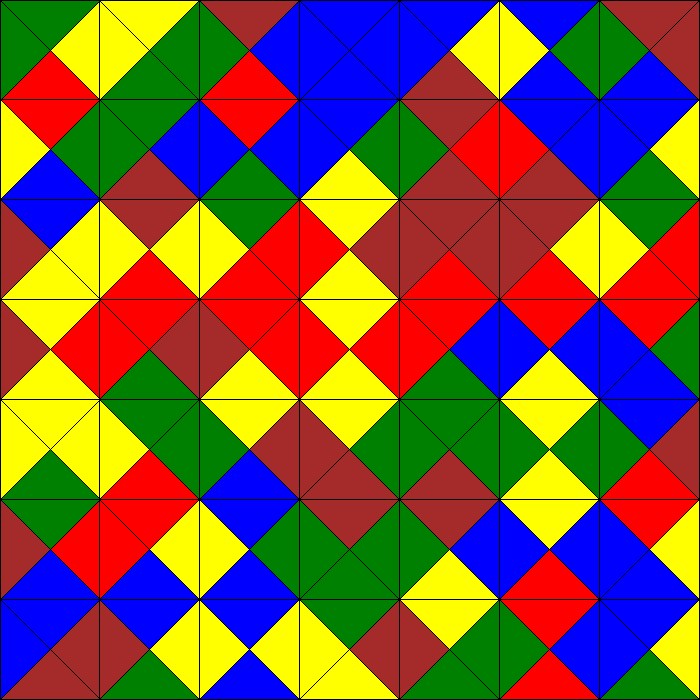

In [164]:
oldbt = oldBT(pieces,size, EMPType='S', rotate=True) 
print(oldbt.search())
drawPuzzle(oldbt.grid)

In [100]:
id

'S-2-7-7-396980-NR'

In [169]:
from EMP.Algorithms.BT import BT as oldBT
import random
for i in range(100):
    print(i)
    randseed = random.randint(0,100000)
    size =(5,5)
    pieces, id = generatePuzzle(size, 8, EMPType='S', return_='pieces', rotate=True, seed=randseed)
    print("new BT")
    start = time.time()
    bt = BT(pieces,size, EMPType='S', rotate=True)
    bt.search()
    end = time.time()
    print(end - start)
    print("old BT")
    pieces, id = generatePuzzle(size, 8, EMPType='S', return_='pieces', rotate=True, seed=randseed)
    start = time.time()
    oldbt = oldBT(pieces,size, EMPType='S', rotate=True)
    oldbt.search()
    end = time.time()
    print(end - start)

      


0
new BT
10.218918800354004
old BT
19.266637563705444
1
new BT
33.76497411727905
old BT
32.51901316642761
2
new BT
19.863211393356323
old BT
46.2447714805603
3
new BT
8.134947538375854
old BT
9.57579493522644
4
new BT
18.933420419692993
old BT
14.586335897445679
5
new BT
255.3166913986206
old BT
572.5081415176392
6
new BT
35.18694877624512
old BT
83.64419269561768
7
new BT
7.469322204589844
old BT
12.67896842956543
8
new BT
5.980252504348755
old BT
5.509899616241455
9
new BT
13.698808908462524
old BT
12.026554107666016
10
new BT
4.5872461795806885
old BT
9.439921617507935
11
new BT
0.4562957286834717
old BT
0.6784965991973877
12
new BT
94.40595555305481
old BT
104.5239610671997
13
new BT
12.804059505462646
old BT
14.875528573989868
14
new BT
34.29631042480469
old BT
60.78702926635742
15
new BT
39.41389441490173
old BT
65.55938386917114
16
new BT
11.25196099281311
old BT
7.251147031784058
17
new BT
106.63046526908875
old BT
93.69430732727051
18
new BT
75.05211329460144
old BT
86.3321142

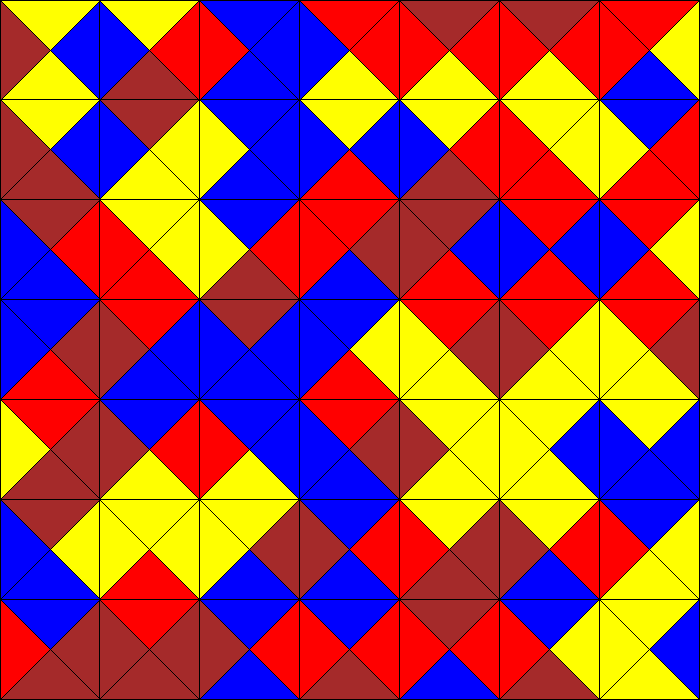

In [167]:
drawPuzzle(oldbt.grid)

In [171]:
result = """0
new BT
10.218918800354004
old BT
19.266637563705444
1
new BT
33.76497411727905
old BT
32.51901316642761
2
new BT
19.863211393356323
old BT
46.2447714805603
3
new BT
8.134947538375854
old BT
9.57579493522644
4
new BT
18.933420419692993
old BT
14.586335897445679
5
new BT
255.3166913986206
old BT
572.5081415176392
6
new BT
35.18694877624512
old BT
83.64419269561768
7
new BT
7.469322204589844
old BT
12.67896842956543
8
new BT
5.980252504348755
old BT
5.509899616241455
9
new BT
13.698808908462524
old BT
12.026554107666016
10
new BT
4.5872461795806885
old BT
9.439921617507935
11
new BT
0.4562957286834717
old BT
0.6784965991973877
12
new BT
94.40595555305481
old BT
104.5239610671997
13
new BT
12.804059505462646
old BT
14.875528573989868
14
new BT
34.29631042480469
old BT
60.78702926635742
15
new BT
39.41389441490173
old BT
65.55938386917114
16
new BT
11.25196099281311
old BT
7.251147031784058
17
new BT
106.63046526908875
old BT
93.69430732727051
18
new BT
75.05211329460144
old BT
86.33211421966553
19
new BT
1.2018325328826904
old BT
3.995870351791382
20
new BT
2.4907796382904053
old BT
2.9090399742126465
21
new BT
35.84736895561218
old BT
42.08979940414429
22
new BT
2.2346034049987793
old BT
2.2806289196014404
23
new BT
0.995913028717041
old BT
1.210855484008789
24
new BT
157.0811653137207
old BT
173.26365542411804
25
new BT
2.558863401412964
old BT
2.412708044052124
26
new BT
18.425052165985107
old BT
20.89397954940796
27
new BT
5.213688373565674
old BT
5.298749208450317
28
new BT
39.49699258804321
old BT
45.81343388557434
29
new BT
34.04210376739502
old BT
43.90306806564331
30
new BT
0.9767084121704102
old BT
1.1187753677368164
31
new BT
8.994364738464355
old BT
17.415339708328247
32
new BT
42.927361726760864
old BT
52.4551362991333
33
new BT
68.7886688709259
old BT
122.01527404785156
34
new BT
14.5224449634552
old BT
22.530000686645508
35
new BT
20.78976345062256
old BT
47.44357633590698
36
new BT
16.325566291809082
old BT
17.492613554000854
37
new BT
7.932612895965576
old BT
9.22052788734436
38
new BT
23.258455276489258
old BT
34.03809404373169
39
new BT
2.702910900115967
old BT
4.011842966079712
40
new BT
0.40427184104919434
old BT
0.5453815460205078
41
new BT
223.74432945251465
old BT
279.73295974731445
42
new BT
5.3277928829193115
old BT
6.5476367473602295
43
new BT
7.646406412124634
old BT
15.03787899017334
44
new BT
65.76658296585083
old BT
7.935673236846924
45
new BT
13.119271039962769
old BT
16.979015350341797
46
new BT
22.791129112243652
old BT
22.76511001586914
47
new BT
10.191398620605469
old BT
10.06412148475647
48
new BT
8.204824447631836
old BT
10.722569942474365
49
new BT
144.8645362854004
old BT
161.89857530593872
50
new BT
29.63896632194519
old BT
29.891155242919922
51
new BT
10.776626348495483
old BT
12.792110919952393
52
new BT
6.564646482467651
old BT
7.588558673858643
53
new BT
4.937518835067749
old BT
5.578965187072754
54
new BT
2.1305248737335205
old BT
4.926469087600708
55
new BT
19.14256191253662
old BT
57.468674182891846
56
new BT
1.6862146854400635
old BT
2.205568552017212
57
new BT
9.03941535949707
old BT
10.968779563903809
58
new BT
45.142943143844604
old BT
51.315436363220215
59
new BT
72.18413615226746
old BT
58.41535782814026
60
new BT
4.267179727554321
old BT
8.89428997039795
61
new BT
1.3929901123046875
old BT
1.494039535522461
62
new BT
11.099868774414062
old BT
23.127366542816162
63
new BT
3.62056303024292
old BT
6.271437883377075
64
new BT
76.48913526535034
old BT
142.63393759727478
65
new BT
8.9943687915802
old BT
9.71986174583435
66
new BT
15.041657447814941
old BT
18.975432634353638
67
new BT
15.507957220077515
old BT
33.71989893913269
68
new BT
3.060166358947754
old BT
5.223695993423462
69
new BT
47.5397675037384
old BT
51.80266094207764
70
new BT
487.1287729740143
old BT
79.8074963092804
71
new BT
127.64633393287659
old BT
143.87382292747498
72
new BT
233.4322154521942
old BT
392.1455297470093
73
new BT
29.624968767166138
old BT
30.65468978881836
74
new BT
42.334959745407104
old BT
52.82537913322449
75
new BT
1.2929198741912842
old BT
1.5451304912567139
76
new BT
11.900421857833862
old BT
15.242768049240112
77
new BT
41.97870922088623
old BT
44.38042426109314
78
new BT
16.12344455718994
old BT
19.948103189468384
79
new BT
3.025161027908325
old BT
5.636987924575806
80
new BT
141.63223242759705
old BT
144.62136244773865
81
new BT
46.480056047439575
old BT
80.0605411529541
82
new BT
11.146113872528076
old BT
16.69282627105713
83
new BT
180.59879636764526
old BT
397.1390686035156
84
new BT
44.24833416938782
old BT
46.25672936439514
85
new BT
32.134790897369385
old BT
41.9707088470459
86
new BT
46.13363432884216
old BT
43.09420585632324
87
new BT
4.3470916748046875
old BT
10.130159378051758
88
new BT
45.527233600616455
old BT
49.24683427810669
89
new BT
47.16539192199707
old BT
72.80471420288086
90
new BT
174.49052453041077
old BT
310.7359049320221
91
new BT
25.267898082733154
old BT
19.427749395370483
92
new BT
22.483927965164185
old BT
45.14793419837952
93
new BT
132.82014417648315
old BT
212.4891698360443
94
new BT
14.663220405578613
old BT
19.000458240509033
95
new BT
23.668736696243286
old BT
27.027144193649292
96
new BT
71.7107310295105
old BT
81.58401155471802
97
new BT
103.63235211372375
old BT
113.24414157867432
98
new BT
7.623405933380127
old BT
16.891958951950073
99
new BT
47.8909068107605
old BT
48.042006492614746"""

In [173]:
result = result.splitlines()

In [219]:
import numpy as np
import matplotlib.pyplot as plt
data = np.zeros((100,))
dataOld = np.zeros((100,))
for i in range(100):
    #print(result[i*5])
    data[i] = result[i*5+2]
    dataOld[i] = result[i*5+4]

In [188]:
data

array([1.02189188e+01, 3.37649741e+01, 1.98632114e+01, 8.13494754e+00,
       1.89334204e+01, 2.55316691e+02, 3.51869488e+01, 7.46932220e+00,
       5.98025250e+00, 1.36988089e+01, 4.58724618e+00, 4.56295729e-01,
       9.44059556e+01, 1.28040595e+01, 3.42963104e+01, 3.94138944e+01,
       1.12519610e+01, 1.06630465e+02, 7.50521133e+01, 1.20183253e+00,
       2.49077964e+00, 3.58473690e+01, 2.23460340e+00, 9.95913029e-01,
       1.57081165e+02, 2.55886340e+00, 1.84250522e+01, 5.21368837e+00,
       3.94969926e+01, 3.40421038e+01, 9.76708412e-01, 8.99436474e+00,
       4.29273617e+01, 6.87886689e+01, 1.45224450e+01, 2.07897635e+01,
       1.63255663e+01, 7.93261290e+00, 2.32584553e+01, 2.70291090e+00,
       4.04271841e-01, 2.23744329e+02, 5.32779288e+00, 7.64640641e+00,
       6.57665830e+01, 1.31192710e+01, 2.27911291e+01, 1.01913986e+01,
       8.20482445e+00, 1.44864536e+02, 2.96389663e+01, 1.07766263e+01,
       6.56464648e+00, 4.93751884e+00, 2.13052487e+00, 1.91425619e+01,
      

In [199]:
i = 30
x = list()
y = list()
while i < 101:
    y.append(i)
    x.append(np.std(data[0:i]))
    i += 10

In [200]:
x, y

([53.97536175918695,
  48.24119141189407,
  54.176200684785805,
  50.58822756654841,
  47.91387952120331,
  72.06514663247461,
  70.51906990088617,
  69.32513562935146],
 [30, 40, 50, 60, 70, 80, 90, 100])

Text(0.5,0,'number of puzzles solved')

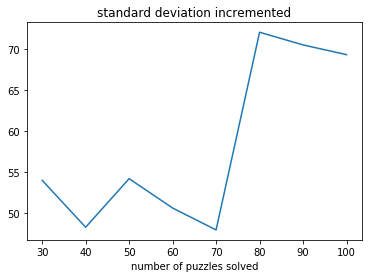

In [204]:
plt.plot(y, x)
plt.title("standard deviation incremented")
plt.xlabel("number of puzzles solved")


Text(0,0.5,'time')

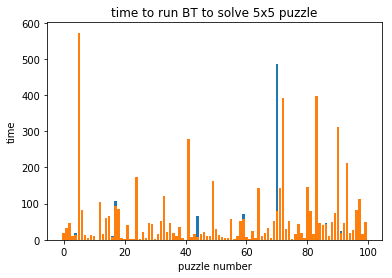

In [220]:
plt.bar([i for i in range(data.size)], data)
plt.bar([i for i in range(data.size)], dataOld)

plt.title("time to run BT to solve 5x5 puzzle")
plt.xlabel("puzzle number")
plt.ylabel("time")

In [223]:
print(np.average(dataOld - data))
print(np.std(dataOld-data))

11.776815495491029
61.2957167769778


In [247]:
from EMP.Algorithms.BT import BT
alg = None
for i in range(1000):
    rand = random.randint(1, 1000000)
    pieces, id = generatePuzzle((3,3), 5, EMPType='S', seed=rand)
    alg = BT(pieces, (3,3), EMPType='S')
    if(alg.search() == False): print(rand)


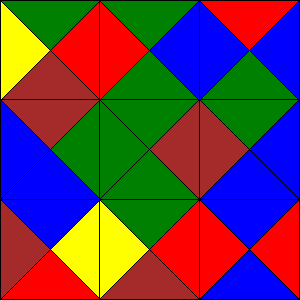

In [248]:
drawPuzzle(alg.grid)

In [5]:
from graphviz import Graph
from EMP.EMP import _combinePieces
import copy
import copy
from EMP.EMP import _rotate, _validPiece, _emptyPiece, _pieceMatch, _removePiece, _nextPosition, _combinePieces, _addCombinedPiece

class TreeGeneration:
    
    def __init__(self, pieces, grid, output, id, EMPType='SF', rotate=True):
        if EMPType not in ['SF','S']:
            raise AssertionError("EMPType "+EMPType+" not defined.")

        if type(pieces) != list: raise AssertionError("pieces should be a list.")
        if type(grid) == tuple:
            # create the grid with None for colors
            if(EMPType == 'SF' or EMPType == 'S'):
                grid=[[[ -2 for x in range(4)]for y in range(grid[0])] for p in range(grid[1])]
            
        elif type(grid) != list: raise AssertionError("grid should be a tuple or list.")
        
        self.pieces = pieces
        self.grid = grid
        self.EMPType = EMPType
        self.solution = None
        self.rotate = rotate
        self.combinedPieces = _combinePieces(self.pieces, rotate=self.rotate)
        self.g = Graph('G', filename=output+'graphs\\'+str(id)+'.gv')#, engine='neato')
        self.imagesFile = output+'images\\'+str(id)+'\\'
        try: os.makedirs(self.imagesFile)
        except: None
        self.counter = 0
    
    def generate(self, parentNum, position=[0,0]):
        nodeNum = self.counter
        self.counter += 1
        
        drawPuzzle(self.grid, pieceLength=30).save(self.imagesFile+str(nodeNum)+'.png', format='png')
        self.g.node(str(nodeNum), label='', shape='box', image=self.imagesFile+str(nodeNum)+'.png')
        if parentNum != -1:
            self.g.edge(str(parentNum), str(nodeNum))

        if position == False:
            return True

        pos = list(position)
        #tempPieces = copy.deepcopy(self.combinedPieces)
        #print(self.combinedPieces)
        for piece in self.combinedPieces:
            if piece[1] > 0:
                if self.rotate:
                    for i in range(4):
                        piece[0] = _rotate(piece[0], 1)
                        
                        if _pieceMatch(self.grid, piece[0], pos, EMPType=self.EMPType):
                            self.grid[pos[0]][pos[1]] = piece[0]
                            if piece[1] > 0: 
                                piece[1] -= 1
                            else: raise Exception("piece not in list to remove")

                            self.generate(nodeNum,position=_nextPosition(self.grid, pos))
                                
                                                      
                            piece[1] += 1
                            self.grid[pos[0]][pos[1]] = [-2, -2, -2, -2]
                else:
                    if _pieceMatch(self.grid, piece[0], pos, EMPType=self.EMPType):
                        self.grid[pos[0]][pos[1]] = piece[0]
                        if piece[1] > 0: 
                            piece[1] -= 1
                        else: raise Exception("piece not in list to remove")
                        self.generate(nodeNum, position=_nextPosition(self.grid, pos))

                        piece[1] += 1
                        self.grid[pos[0]][pos[1]] = [-2, -2, -2, -2]
        return False
    


In [ ]:
files = list()
for i in range(100):
    pieces, id = generatePuzzle((4,4), 4, EMPType='S', rotate=False)
    TG = TreeGeneration(pieces, (4,4),"", id, EMPType='S', rotate=False)
    TG.generate(-1)
    TG.g.save()
    files.append(id+'.gv')

file = open('all_files.txt', 'w')
for fl in files:
    file.write(fl+'\n')
file.close()


In [61]:
files = list()
for i in range(1):
    E_grid = [[[ None for x in range(4)]for y in range(3)] for p in range(5)]
    E_grid[1][1] = E_grid[1][2] = [-1,-1,-1,-1]
    E_grid[3][1] = E_grid[3][2] = [-1,-1,-1,-1]

    puzzle, id = generatePuzzle(E_grid, 4, EMPType='S',  rotate=False)
    E_grid = [[[ None for x in range(4)]for y in range(3)] for p in range(5)]
    E_grid[1][1] = E_grid[1][2] = [-1,-1,-1,-1]
    E_grid[3][1] = E_grid[3][2] = [-1,-1,-1,-1]
    TG = TreeGeneration(puzzle, E_grid,"", id, EMPType='S', rotate=False)
    TG.generate(-1)
    TG.g.save()
    files.append(id+'.gv')

file = open('all_files.txt', 'w')
for fl in files:
    file.write(fl+'\n')
file.close()



In [47]:
try: os.makedirs('test')
except: None
img.save('test\\test2.png','png')

In [ ]:
    E_grid = [[[ None for x in range(4)]for y in range(3)] for p in range(5)]
    E_grid[1][1] = E_grid[1][2] = [-1,-1,-1,-1]
    E_grid[3][1] = E_grid[3][2] = [-1,-1,-1,-1]

    puzzle, id = generatePuzzle(E_grid, 4, EMPType='SF',  rotate=False)
    bt = BT(puzzle,)